# code to collect the X data

`
conda activate data_collection

export PYTHONPATH=src

python src/scripts/run_x_batch.py
`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## combine dataset

In [9]:
data_example = pd.read_csv("/home/lila/github-clones/social_media_data_colletion/data/x_batch_2023_2.csv")
columns = data_example.columns.tolist()
print("Columns in the dataset:")
for col in columns:
    print(col)

Columns in the dataset:
x_id
tweet_id
created_at
lang
retweet_count
reply_count
like_count
quote_count
text


In [11]:
columns = [ 'x_id',
'tweet_id',
'created_at',
'lang',
'retweet_count',
'reply_count',
'like_count',
'quote_count',
'text']

In [17]:
import os
import sys
from typing import Iterable, List, Optional

import pandas as pd


def combine_datasets(
    dataset_paths: Iterable[str],
    output_path: str,
    columns: Optional[List[str]] = None,
    drop_duplicates: bool = True,
) -> None:
    """
    Combine multiple CSV datasets side-by-side following a shared schema.
    All inputs are expected to contain the requested columns in the same order.
    """
    dataset_paths = list(dataset_paths)
    if not dataset_paths:
        raise ValueError("dataset_paths is empty.")

    combined_frames: List[pd.DataFrame] = []

    for path in dataset_paths:
        df = pd.read_csv(path)
        if columns:
            missing = [c for c in columns if c not in df.columns]
            if missing:
                raise ValueError(f"{path} is missing columns: {missing}")
            df = df[columns]
        elif columns is None:
            columns = list(df.columns)

        combined_frames.append(df)

    combined_df = pd.concat(combined_frames, ignore_index=True)

    if drop_duplicates:
        combined_df = combined_df.drop_duplicates()

    combined_df.to_csv(output_path, index=False)
    print(f"Combined {len(dataset_paths)} datasets → {output_path} ({len(combined_df)} rows)")


    

In [18]:
columns = [
        "x_id",
        "tweet_id",
        "created_at",
        "lang",
        "retweet_count",
        "reply_count",
        "like_count",
        "quote_count",
        "text",
    ]

dataset_paths = [
        "data/x_batch_2023.csv",
        "data/x_batch_2023_2.csv",
        "data/x_batch_2024.csv",
        "data/x_batch_2025.csv",
    ]

combine_datasets(dataset_paths, "data/x_combined.csv", columns=columns)

        
    

Combined 4 datasets → data/x_combined.csv (987 rows)


In [ ]:
dataset_paths = ['/home/lila/github-clones/social_media_data_colletion/data/x_batch_2023_2.csv',
                    '/home/lila/github-clones/social_media_data_colletion/data/x_batch_2023.csv',
                    '/home/lila/github-clones/social_media_data_colletion/data/x_batch_2024.csv',
                    '/home/lila/github-clones/social_media_data_colletion/data/x_batch_2025.csv']


output_path = '/home/lila/github-clones/social_media_data_colletion/data/x_combined_5tests.csv'
combine_datasets(dataset_paths, output_path)


Combined 4 datasets → /home/lila/github-clones/social_media_data_colletion/data/x_combined_5tests.csv (987 rows)


,x_id,tweet_id,created_at,lang,retweet_count,reply_count,like_count,quote_count,text
0,487333261,1.736669e+18,2023-12-18T08:45:48.000Z,fi,4,1,42,2,Hiilidioksidi talteen piipun päästä? Pohdimme ...
1,487333261,1.735515e+18,2023-12-15T04:20:25.000Z,fi,2,0,10,0,Vahvistamme nuorten metsäsuhdetta yhdessä @4Hs...
2,487333261,1.735256e+18,2023-12-14T11:10:11.000Z,fi,9,0,32,2,Mahtavia startup-uutisia! Metsä Group on sijoi...
3,487333261,1.733920e+18,2023-12-10T18:41:36.000Z,fi,1,0,9,0,Syrjimättömyys ja yhdenvertaisuus ovat keskeis...
4,487333261,1.732708e+18,2023-12-07T10:24:35.000Z,fi,0,0,15,0,Kesätyöt kiikarissa? 👀 Töitä löytyy monenlais...


In [2]:

output_path = '/home/lila/github-clones/social_media_data_colletion/data/x_combined_5tests.csv'
data = pd.read_csv(output_path)
data.head()


,x_id,tweet_id,created_at,lang,retweet_count,reply_count,like_count,quote_count,text
0,487333261,1.736669e+18,2023-12-18T08:45:48.000Z,fi,4,1,42,2,Hiilidioksidi talteen piipun päästä? Pohdimme ...
1,487333261,1.735515e+18,2023-12-15T04:20:25.000Z,fi,2,0,10,0,Vahvistamme nuorten metsäsuhdetta yhdessä @4Hs...
2,487333261,1.735256e+18,2023-12-14T11:10:11.000Z,fi,9,0,32,2,Mahtavia startup-uutisia! Metsä Group on sijoi...
3,487333261,1.733920e+18,2023-12-10T18:41:36.000Z,fi,1,0,9,0,Syrjimättömyys ja yhdenvertaisuus ovat keskeis...
4,487333261,1.732708e+18,2023-12-07T10:24:35.000Z,fi,0,0,15,0,Kesätyöt kiikarissa? 👀 Töitä löytyy monenlais...


## translate with pre-trained models

pip install sentencepiece

pip install torch

pip install transformers

In [5]:
import torch
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

print("cuda available:", torch.cuda.is_available())
print("num gpus:", torch.cuda.device_count())
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(i, torch.cuda.get_device_name(i))

# pick one GPU (0 is the first)
GPU_SMALL = 0
GPU_BIG   = 0  # GPU

translator_small = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-fi-en",
    device=GPU_SMALL,              # <-- GPU id, 0 means "cuda:0"
    torch_dtype=torch.float16,     # faster + less VRAM (works on most NVIDIA GPUs)
)

translator_big = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-tc-big-fi-en",
    device=GPU_BIG,
    torch_dtype=torch.float16,
)

tqdm.pandas()

def translate_small(text):
    if pd.isna(text):
        return text
    text = str(text).strip()
    if not text:
        return text
    return translator_small(text, max_length=512)[0]["translation_text"]

df = data.copy()
df["text_en_small"] = df["text"].progress_apply(translate_small)
# save
df.to_csv('/home/lila/github-clones/social_media_data_colletion/data/x_combined_5tests_translated_small.csv', index=False)


cuda available: True
num gpus: 1
0 NVIDIA GeForce GTX 1070


/home/lila/anaconda3/envs/data_collection/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/lila/anaconda3/envs/data_collection/lib/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
  1%|          | 11/987 [00:02<03:11,  5.10it/s]/home/lila/anaconda3/envs/data_collection/lib/python3.11/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 987/987 [03:14<00:00,  5.08it/s]


In [6]:
def show_row(i):
    row = df.iloc[i]
    print("FI :", row["text"])
    print("SM :", row["text_en_small"])

show_row(0)


FI : Hiilidioksidi talteen piipun päästä? Pohdimme talteenottolaitoksen rakentamista.  https://t.co/PfrRCE58YN https://t.co/Jryg3NKvyQ
SM : Carbon dioxide recovered from the end of the pipe? We are considering the construction of a recovery facility. https://t.co/PfrCE58YN https://t.co/Jryg3NKvyQ


## Analysis

In [7]:
df_path = '/home/lila/github-clones/social_media_data_colletion/data/x_combined_5tests_translated_small.csv'
df = pd.read_csv(df_path)
df.head()

,x_id,tweet_id,created_at,lang,retweet_count,reply_count,like_count,quote_count,text,text_en_small
0,487333261,1.736669e+18,2023-12-18T08:45:48.000Z,fi,4,1,42,2,Hiilidioksidi talteen piipun päästä? Pohdimme ...,Carbon dioxide recovered from the end of the p...
1,487333261,1.735515e+18,2023-12-15T04:20:25.000Z,fi,2,0,10,0,Vahvistamme nuorten metsäsuhdetta yhdessä @4Hs...,We strengthen the forest relationship of young...
2,487333261,1.735256e+18,2023-12-14T11:10:11.000Z,fi,9,0,32,2,Mahtavia startup-uutisia! Metsä Group on sijoi...,Great start-up news! Metsä Group has invested ...
3,487333261,1.733920e+18,2023-12-10T18:41:36.000Z,fi,1,0,9,0,Syrjimättömyys ja yhdenvertaisuus ovat keskeis...,Non-discrimination and non-discrimination are ...
4,487333261,1.732708e+18,2023-12-07T10:24:35.000Z,fi,0,0,15,0,Kesätyöt kiikarissa? 👀 Töitä löytyy monenlais...,Summer work in binoculars? . Work can be found...


In [8]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import pandas as pd


model_name = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

emotion_pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    top_k=None,  # return all labels with scores
    truncation=True
)

def score_emotions(text):
    if not isinstance(text, str) or not text.strip():
        return {}
    result = emotion_pipe(text)[0]
    # convert list of dicts to {label: score}
    return {item["label"]: item["score"] for item in result}

# apply to your column
df["emotion_scores"] = df["text_en_small"].apply(score_emotions)

# example: extract the max-score label
df["top_emotion"] = df["emotion_scores"].apply(lambda scores: max(scores, key=scores.get) if scores else None)

df[["text_en_small", "top_emotion"]].head()


/home/lila/anaconda3/envs/data_collection/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,text_en_small,top_emotion
0,Carbon dioxide recovered from the end of the p...,neutral
1,We strengthen the forest relationship of young...,neutral
2,Great start-up news! Metsä Group has invested ...,admiration
3,Non-discrimination and non-discrimination are ...,neutral
4,Summer work in binoculars? . Work can be found...,neutral


In [9]:
df.to_csv('/home/lila/github-clones/social_media_data_colletion/data/x_combined_5tests_translated_small_emotions.csv', index=False)

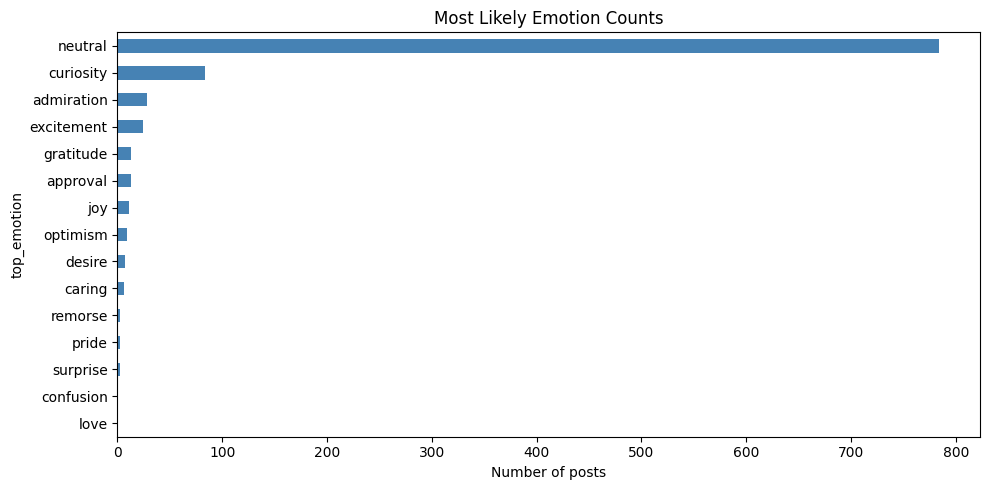

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# emotion_scores column from earlier (dict per row)
all_emotions = pd.json_normalize(df["emotion_scores"]).fillna(0)

# frequency of the top emotion per row
top_counts = df["top_emotion"].value_counts()

plt.figure(figsize=(10,5))
top_counts.sort_values().plot(kind="barh", color="steelblue")
plt.title("Most Likely Emotion Counts")
plt.xlabel("Number of posts")
plt.tight_layout()
plt.show()


In [13]:
from wordcloud import WordCloud, STOPWORDS

custom_stopwords = STOPWORDS.union({
    "https", "http", "www", "com", "co", "amp", "t.co", "bit.ly",
    "rt", "via", "amp", "ampamp", "ampampamp"
})

def emotion_wordcloud(emotion, max_words=200):
    texts = df.loc[df["top_emotion"] == emotion, "text_en_small"].dropna()
    if texts.empty:
        print(f"No rows labelled {emotion}.")
        return
    corpus = " ".join(texts)
    wc = WordCloud(
        width=1000,
        height=500,
        background_color="white",
        max_words=max_words,
        collocations=False,
        stopwords=custom_stopwords
    ).generate(corpus)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud – {emotion}")
    plt.show()



In [14]:
import re

url_pattern = re.compile(r"http[s]?://\S+")
df["text_clean"] = df["text_en_small"].str.replace(url_pattern, "", regex=True)


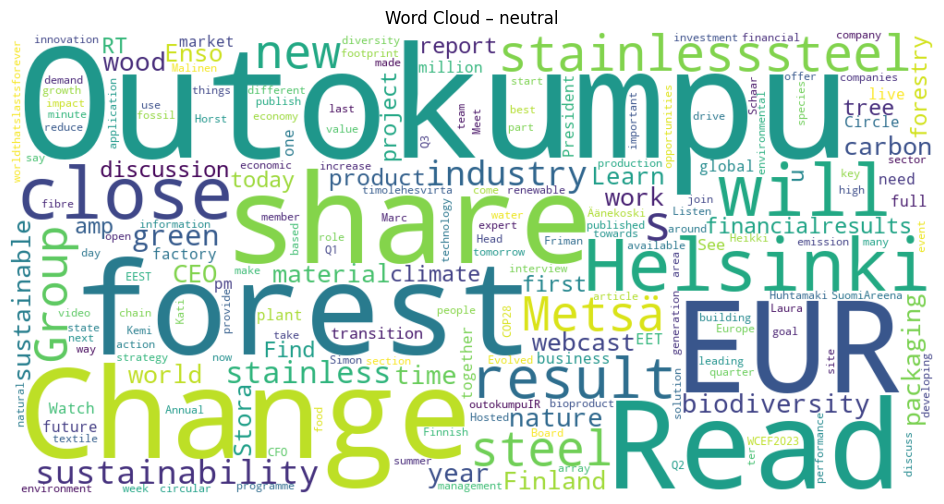

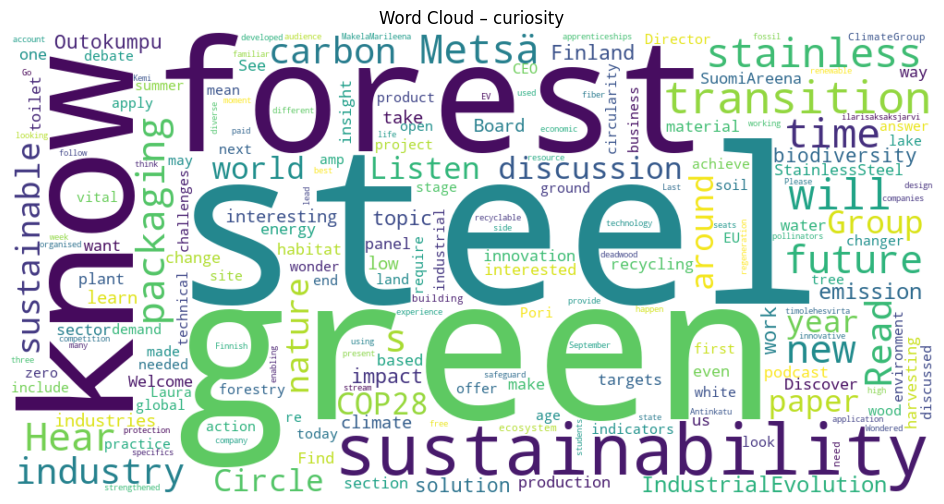

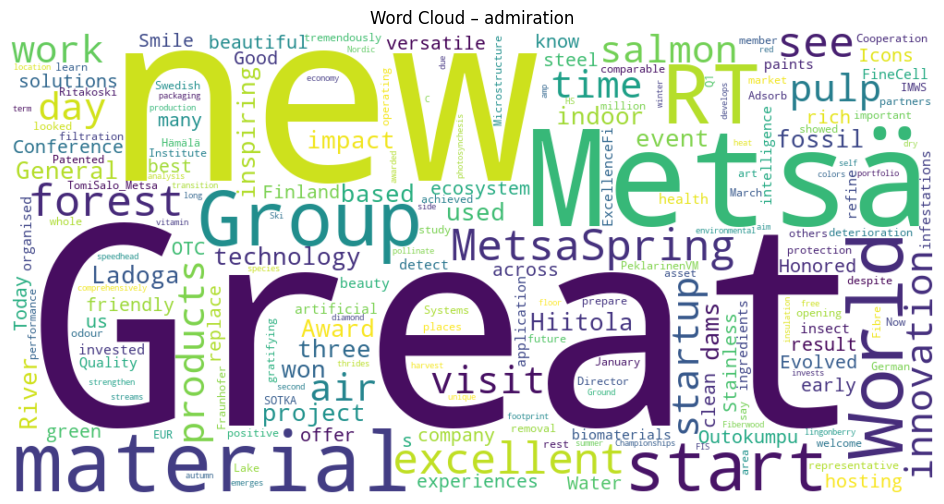

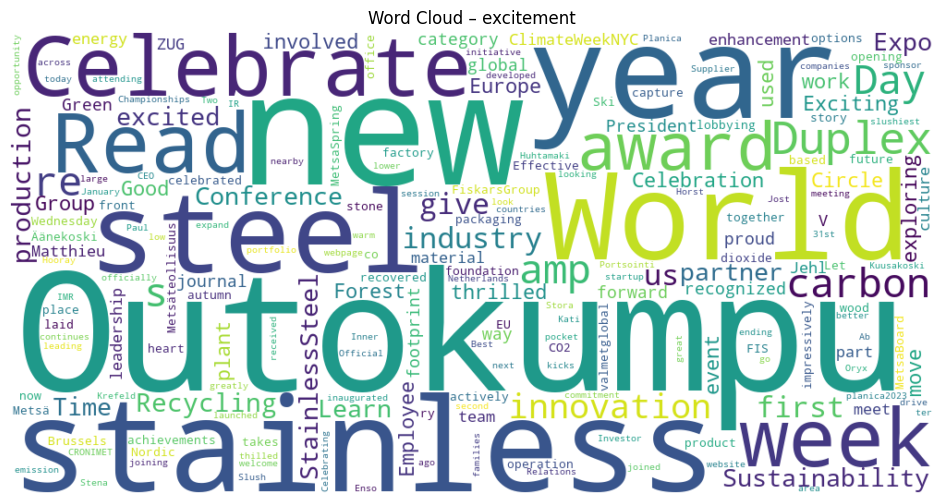

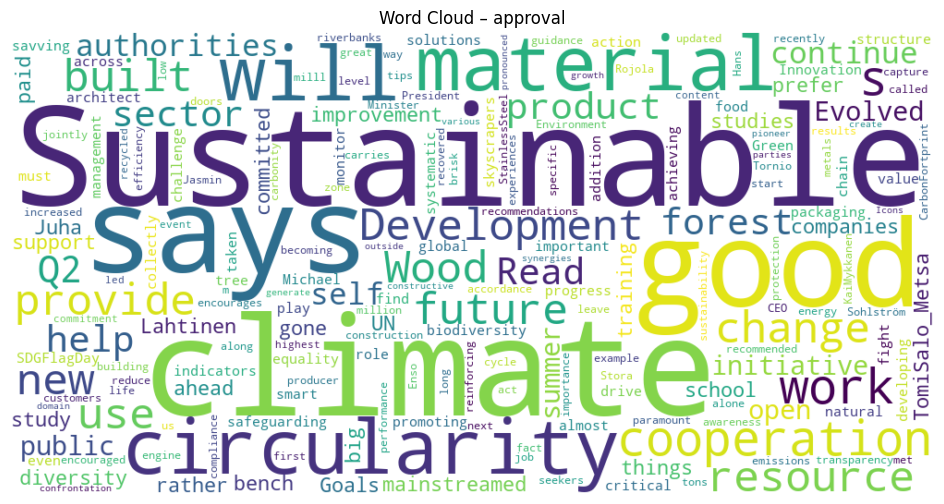

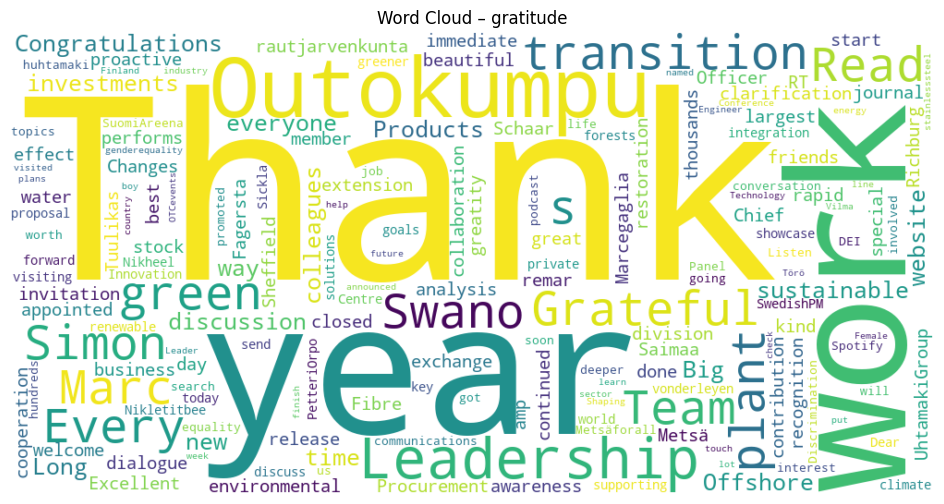

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def emotion_wordcloud(emotion, max_words=200):
    texts = df.loc[df["top_emotion"] == emotion, "text_clean"].dropna()
    if texts.empty:
        print(f"No rows labelled {emotion}.")
        return
    corpus = " ".join(texts)
    wc = WordCloud(
        width=1000, height=500, background_color="white",
        max_words=max_words, collocations=False
    ).generate(corpus)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud – {emotion}")
    plt.show()

# Example: show the most frequent emotions
top_emotions = df["top_emotion"].value_counts().head(6).index
for emo in top_emotions:
    emotion_wordcloud(emo)
